# 3. Espectro de frecuencias de una señal

## 3.1. Ejemplo: tonos puros

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

import pyaudio

In [2]:
notes = {'do5':261.63,'mi5':329.63,'fa5':392.00,'la5':440.}
vol = 0.9     
sr  = 22050       
d   = 10.0
ns  = sr*d

In [3]:
p     = pyaudio.PyAudio()
music = ( np.sin( 2*np.pi* np.arange(ns)*notes['la5']/float(sr) ) ).astype(np.float32)

stream = p.open(  format=pyaudio.paFloat32,
                  channels=1,
                  rate=sr,
                  output=True)

stream.write(vol*music)
stream.stop_stream()
stream.close()

p.terminate()

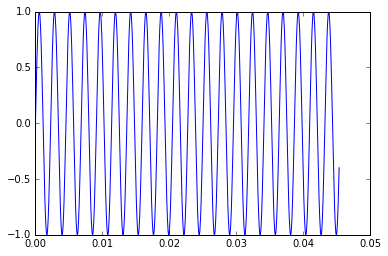

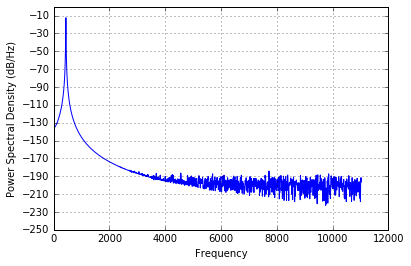

In [4]:
k = 1000.
t = np.linspace(0,k/sr,int(k) )
plt.plot(t,music[:int(k)])
plt.show()


trash = plt.psd(music,Fs=sr,NFFT=2**12)
trash = plt.show()

In [5]:
p      = pyaudio.PyAudio()
music  = ( np.sin( 2*np.pi* np.arange(ns)*notes['la5']/float(sr)    ) ).astype(np.float32)
music += ( np.sin( 2*np.pi* np.arange(ns)*notes['la5']/float(sr)*4. ) ).astype(np.float32)

stream = p.open(  format=pyaudio.paFloat32,
                  channels=1,
                  rate=sr,
                  output=True)

stream.write(vol*music)
stream.stop_stream()
stream.close()

p.terminate()

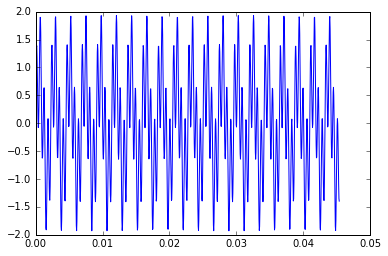

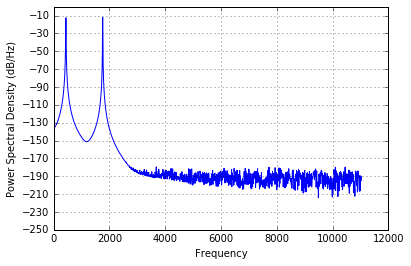

In [6]:
k = 1000.
t = np.linspace(0,k/sr,int(k) )
plt.plot(t,music[:int(k)])
plt.show()


trash = plt.psd(music,Fs=sr,NFFT=2**12)
trash = plt.show()

In [7]:
p      = pyaudio.PyAudio()
music  = ( np.sin( 2*np.pi* np.arange(ns)*notes['do5']/float(sr) ) ).astype(np.float32)
music += ( np.sin( 2*np.pi* np.arange(ns)*notes['mi5']/float(sr) ) ).astype(np.float32)
music += ( np.sin( 2*np.pi* np.arange(ns)*notes['la5']/float(sr) ) ).astype(np.float32)

stream = p.open(  format=pyaudio.paFloat32,
                  channels=1,
                  rate=sr,
                  output=True)

stream.write(vol*music)
stream.stop_stream()
stream.close()

p.terminate()

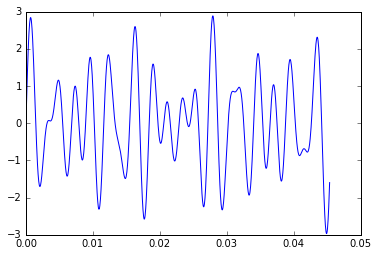

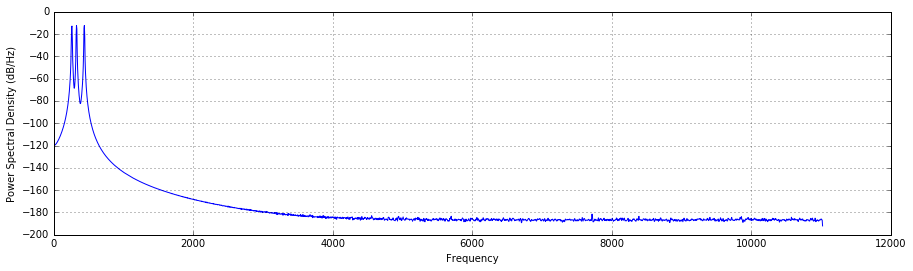

In [8]:
k = 1000.
t = np.linspace(0,k/sr,int(k) )
plt.plot(t,music[:int(k)])
plt.show()

plt.figure(figsize=(15,4))
trash = plt.psd(music,Fs=sr,NFFT=2**12)
trash = plt.show()

## 3.2 Espectro de frecuencias

**Ejemplo.** Dado cualquier sistema lineal invariante en tiempo $H(s)$. Si la entrada de dicho sistema es una señal cuadrada ¿La salida será una onda cuadrada?

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

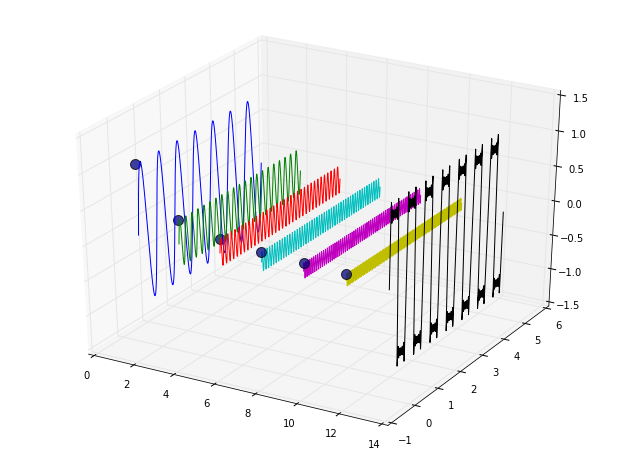

In [10]:
fig = plt.figure(figsize=(11, 8))
ax = fig.gca(projection='3d')

t     = np.linspace(0, 7, 1000)
y     = np.linspace(0, 5, 1000)

F     = np.array( [1,3,5,7,9,11] )
X, Zx = [], []
Z     = np.zeros(len(t))
for f in F:
    z     =   np.sin (2*np.pi*f*t)/f
    x     = f*np.ones(z.shape[0])
    Z    += z
    X     .append(x[0])
    Zx    .append(z.max())
    ax.plot(x, y, z)


# Plot Sum in time domain
f     = 10.
x     = (F.max()+2)*np.ones(z.shape[0])
ax.plot(x, y, 4*Z/np.pi,color='k')


for i,j in zip(X,Zx):
    ax.scatter([i], [0], [j], c=100, s=100, alpha=.75)

plt.show()

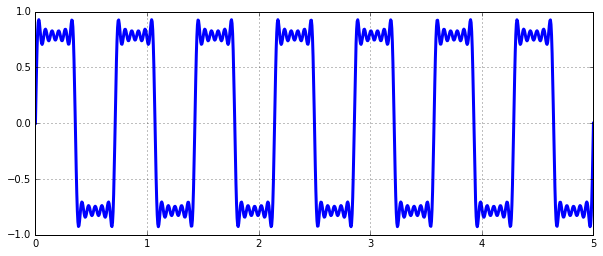

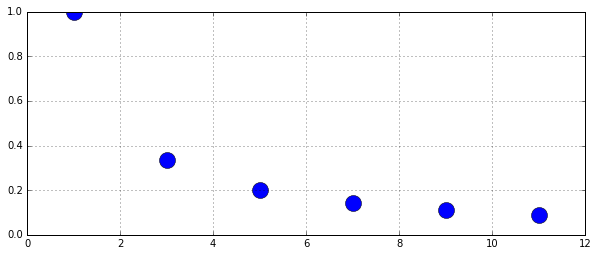

In [11]:
plt.figure(figsize=(10,4))
plt.plot(y,Z,linewidth=3)
plt.grid('on')

plt.figure(figsize=(10,4))
plt.plot(X,Zx,'o',markersize=16)
plt.grid('on')
plt.show()


## 3.3. Señales bioeléctricas humanas

In [24]:
import wfdb
import os

datapath = os.path.abspath('../../data/')

### Electrocardiograma ECG/EKG

In [26]:
study       = '/001a'
data,fields = wfdb.srdsamp( datapath+study)
sr          = fields['fs']; print sr

1000


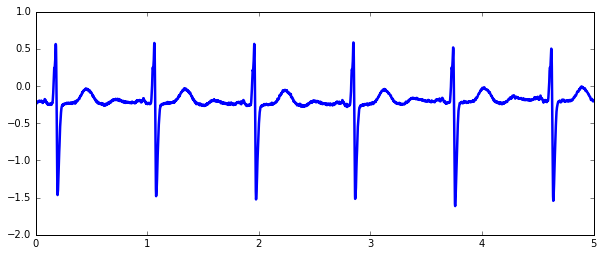

In [29]:
d,ch = 5, 2
l    = sr*d
sgm  = data[:l].T[ch]
t    = np.linspace(0,d,l)

plt.figure(figsize=(10,4))
plt.plot(t,sgm,linewidth=2.5)
plt.show()

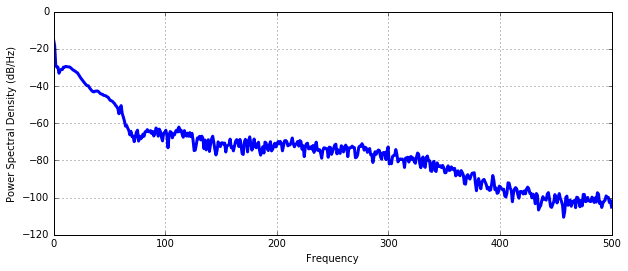

In [15]:
plt.figure(figsize=(10,4))
plt.psd(sgm,Fs=sr,NFFT=1024,linewidth=3)
plt.show()

### Electroencefalograma EEG

In [30]:
import os
import wfdb

datapath = os.path.abspath('../../data/')
study    = '/100'

data,fields = wfdb.srdsamp( datapath+study)
sr          = fields['fs']; print sr

250


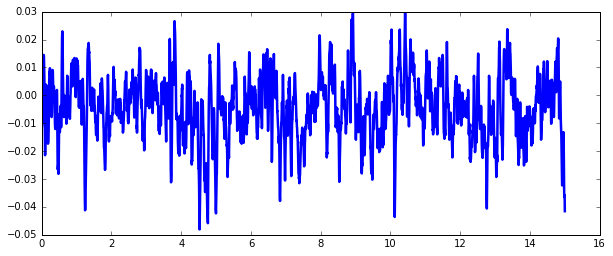

In [31]:
d,ch = 15, 2
l    = sr*d
sgm  = data[:l].T[ch]
t    = np.linspace(0,d,l)

plt.figure(figsize=(10,4))
plt.plot(t,sgm,linewidth=2.5)
plt.show()

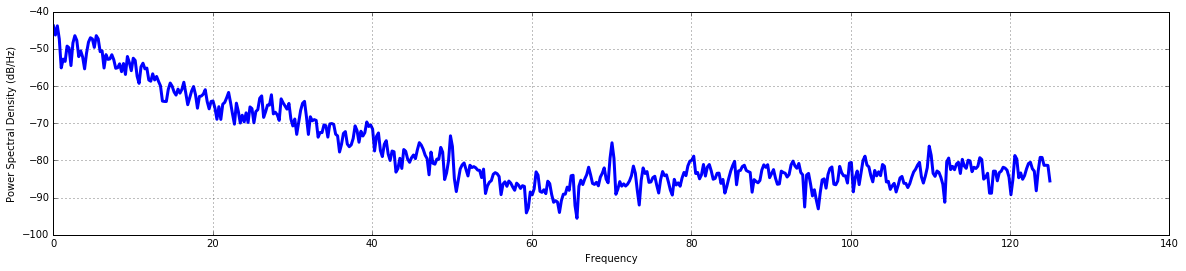

In [35]:
plt.figure(figsize=(20,4))
plt.psd(sgm,Fs=sr,NFFT=1024,linewidth=3)
plt.show()

### Respiración Nasal

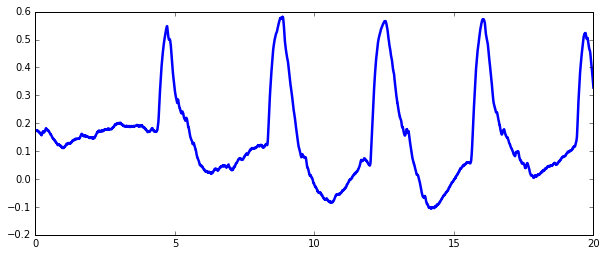

In [36]:
d,ch = 20, 4
l    = sr*d
sgm  = data[:l].T[ch]
t    = np.linspace(0,d,l)

plt.figure(figsize=(10,4))
plt.plot(t,sgm,linewidth=2.5)
plt.show()

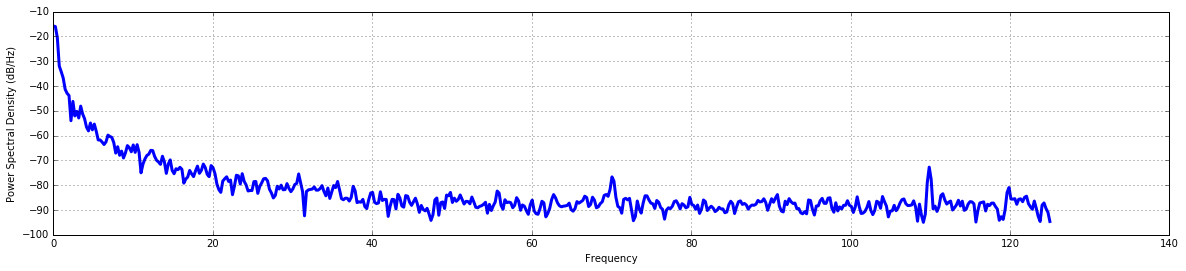

In [37]:
plt.figure(figsize=(20,4))
plt.psd(sgm,Fs=sr,NFFT=1024,linewidth=3)
plt.show()

### Electromiograma EMG

In [38]:
import os
import wfdb

datapath = os.path.abspath('../../data/')
study    = '/emg_healthy'

data,fields = wfdb.srdsamp( datapath+study)
sr          = fields['fs']; print sr

4000


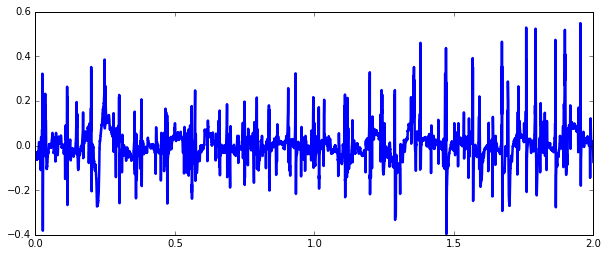

In [40]:
d    = 2
l    = sr*d
sgm  = data[:l]
t    = np.linspace(0,d,l)

plt.figure(figsize=(10,4))
plt.plot(t,sgm,linewidth=2.5)
plt.show()

(8000, 1)


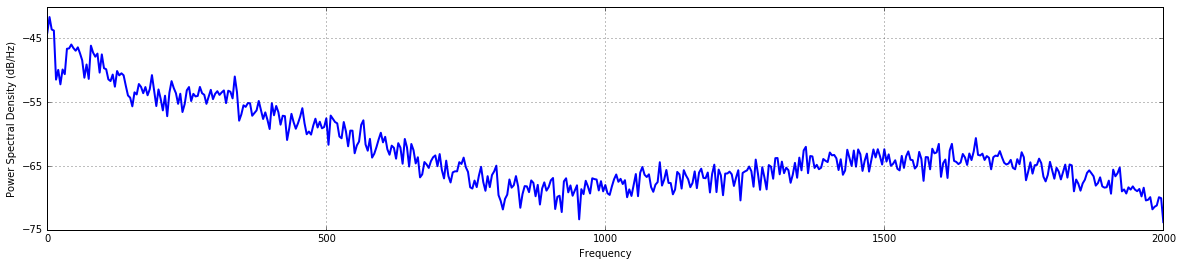

In [41]:
print sgm.shape

plt.figure(figsize=(20,4))
plt.psd(sgm[:,0],NFFT=1024,Fs=sr,linewidth=2)
plt.show()